<a href="https://colab.research.google.com/github/LinarKulinar/VortexBeamResearch/blob/main/forming_vortex_beam_master_research_2022_forming_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вихревые оптические пучки
## НИР Ахметов Линар 6133 2 семестр магистратуры
### Тема НИР: Распознавание мультиплексированных вихревых пучков с использованием нейронных сетей



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

Определим функцию *f*, которая задает значение поля в точке *(r, phi)* с учётом параметров *m∈ℤ* и σ∈ℜ.:

$ f(r, ϕ) = exp(-\cfrac{r^2}{σ^2}) \cdot r^{|m|} \cdot exp(i \cdot m \cdot ϕ) $

Сразу же и пропустим пучок через наклоненную линзу. В некотором приближении это преоразованияе описывает формула ниже:


$ tilt(r, ϕ) = exp(i \cdot α \cdot x \cdot y) $,

где $α$-малый угол наклона линзы

In [2]:
def f_with_tilt (r, phi, m, sigma, alpha):
    """
    Функция, описывающая входной вихревой пучок, который пропустили через наклоненную линзу. 
    :param r: удаление точки от центра изображения
    :param phi: угол точки в исходном пучке
    :param m: параметр пучка - угловой орбительный момент
    :param sigma: параметр пучка - радиус перетяжки
    :param alpha: параметр линзы, сквозь который проходит пучок - угол (в радианах) отклонения оси линзы от линии распространения пучка
    :return значение функции в точке (r, phi)
    """
    assert abs(alpha) <= 0.7 # т.к. предельный угол полного отражения на границе среды воздух-стекло равен 37 градусов. А вообще вроде угол должен быть прям совсем малым (по предположениям, которые позволяют юзать формулу измненеия поля при пропускании через наклюненную линзу)
    x = r*math.cos(phi)
    y = r*math.sin(phi)  
    return math.exp(-(r/sigma)**2) * r**abs(m) * (math.cos(m * phi) + math.sin(m * phi)*1j) * (math.cos(alpha * x * y) + math.sin(alpha * x * y)*1j)

Определим функцию, создающую и вычисляющую значение функции *f(r, ϕ)* в каждой точке квадратного поля размером *(-size, size)*  с числом отсчётов, переданных в кортеже *matrix_shape*

In [3]:
def get_field_with_tilt_and_control_size(image_size, vertex_size, matrix_shape, m, sigma, alpha):
    """
    Создаёт и вычисляет значение функции f(r, ϕ) в каждой точке квадратного поля размером (-size, size) с числом отсчётов, переданных в кортеже matrix_shape
    """
    assert len(matrix_shape) == 2
    assert matrix_shape[0] % 2 == 1
    assert matrix_shape[1] % 2 == 1
    
    x_linspace = np.linspace(-image_size, image_size, matrix_shape[0])
    y_linspace = np.linspace(-image_size, image_size, matrix_shape[1]) 
    field = np.zeros(matrix_shape, dtype=complex)

    for i in range(matrix_shape[0]):
        for j in range(matrix_shape[1]):
            middle = min(matrix_shape) // 2
            di = i - middle
            dj = j - middle
            if abs(di) ** 2 + abs(dj) ** 2 <= middle ** 2:  # Если мы находимся внутри круга с радиусом, равным count/2
                phi = math.atan2(di, dj) # в полярных координатах
                r_coord = math.sqrt(x_linspace[i]**2 + y_linspace[j]**2)
                field[i,j] = f_with_tilt (r_coord, phi, m, sigma, alpha)
    return (field, x_linspace, y_linspace)

Определим функцию, формирующую изображения пучков из комплексного numpy-массива field

In [4]:
def plot_field(field, x_linspace, y_linspace, print_mode=["amplitude", "intensity", "phase"]):
    """
    Функция отрисовывающая комплексное поле field. Масшабы по осям изображения определяются 
    :param field: Комплексное двумерное поле
    :param x_linspace: Масштаб на изображении по оси x определяется этим linspace
    :param y_linspace: Масштаб на изображении по оси x определяется этим linspace
    :param print_mode: Список, позволяет указать необходимые рисунки с помощью этого параметра из списка ["amplitude", "intensity", "phase"]
    :return значение функции в точке (r, phi)
    """
    import matplotlib.cm as cmap
    extent = [np.max(y_linspace), np.min(y_linspace), np.min(x_linspace), np.max(x_linspace)] # для корректных чисел на осях графика
    factor_for_colorbar = 15 / 12 # сраная магия подбора для matplotlib
    height_of_image = 6 # константа, пропорциональная высоте картинки
    
    if ("amplitude" in print_mode):
        plt.figure(figsize=(factor_for_colorbar * height_of_image * field.shape[1]/field.shape[0], height_of_image))
        #plt.figure(figsize=(7.5, 6)) # только для квадратных картинок
        plt.imshow(np.absolute(field), cmap=cmap.hot, aspect='auto', extent=extent)
        plt.title("Амплитуда комплексного поля")
        plt.ylabel('y, расстояние (см)')
        plt.xlabel('x, расстояние (см)')
        plt.grid(True)
        plt.colorbar()
        #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
        plt.show()

    if ("intensity" in print_mode):
        plt.figure(figsize=(factor_for_colorbar * height_of_image * field.shape[1]/field.shape[0], height_of_image))
        plt.imshow(np.absolute(field)**2, cmap=cmap.hot, aspect='auto', extent=extent)
        plt.title("Интенсивность комплексного поля")
        plt.ylabel('y, расстояние (см)')
        plt.xlabel('x, расстояние (см)')
        plt.grid(True)
        plt.colorbar()
        #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
        plt.show()
    if ("phase" in print_mode):
        plt.figure(figsize=(factor_for_colorbar * height_of_image * field.shape[1]/field.shape[0], height_of_image))
        plt.imshow(np.angle(field), cmap=cmap.hot, aspect='auto', extent=extent)
        plt.title("Фаза комплексного поля")
        plt.ylabel('y, расстояние (см)')
        plt.xlabel('x, расстояние (см)')
        plt.grid(True)
        plt.colorbar()
        #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
        plt.show()

Вызовем вышеописанные функции для отображения пучка *m = 3* и числом отчётов, равным *101* по горизонтали и вертикали 

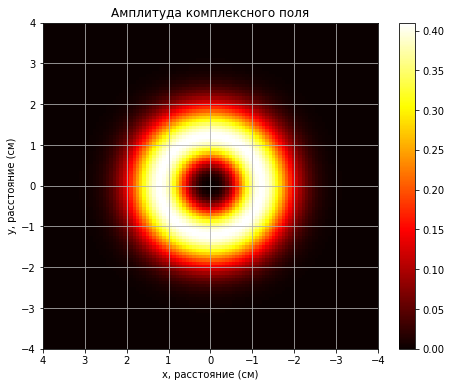

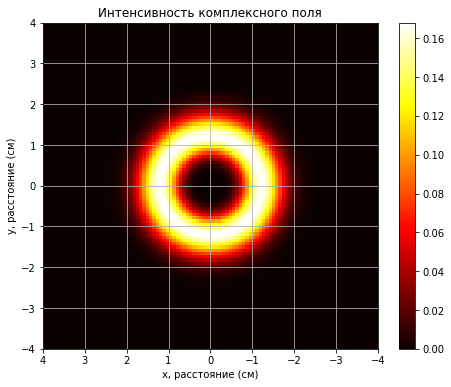

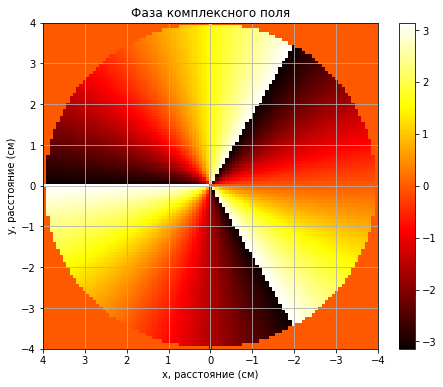

In [5]:
field, x_linspace, y_linspace = get_field_with_tilt_and_control_size(image_size=4, vertex_size=1, matrix_shape=(101, 101), m=3, sigma=1, alpha=0)
plot_field(field, x_linspace, y_linspace)

### Определим функцию, которая дополняет нулями исходную картинку:

In [6]:
def get_field_padded_zeros(field, new_shape, x_linspace, y_linspace):
    """
    Дополняет двухмерное изображение нулями до размера new_shape, если new_shape больше размера картини. Обрезает изображение до размера new_shape, если new_shape меньше размера картинки.
    Если по одной оси надо обрезать, а по второй дополнить нулями, выкинется ValueError
    :param field: изображение
    :param new_shape: новые размеры изображения
    :param x_linspace: размеры входного изображения (в см/м/мм)
    :param y_linspace: размеры входного изображения (в см/м/мм)
    """
    assert len(field.shape) == 2
    assert field.shape[0] % 2 == 1
    assert field.shape[1] % 2 == 1
    
    assert len(new_shape) == 2
    assert new_shape[0] % 2 == 1
    assert new_shape[1] % 2 == 1
    
    field_padded_zeros = np.zeros(new_shape, dtype=field.dtype)
    #print(field_padded_zeros)
    
    diff0dimetional=(new_shape[0]-field.shape[0])//2
    #print("diff0dimetional =",diff0dimetional)
    diff1dimetional=(new_shape[1]-field.shape[1])//2
    #print("diff1dimetional =",diff1dimetional)
    
    if (diff0dimetional >= 0 and diff1dimetional >= 0):  
        #print("slicesindex=[",diff0dimetional, ":", new_shape[0]-diff0dimetional, ",", diff1dimetional, ":", new_shape[1]-diff1dimetional,"]")
        field_padded_zeros[diff0dimetional : new_shape[0]-diff0dimetional, diff1dimetional : new_shape[1]-diff1dimetional] = field
    else:
        if (diff0dimetional <= 0 and diff1dimetional <= 0):
            #print("slicesindex=[",-diff0dimetional, ":", field.shape[0]+diff0dimetional, ",", -diff1dimetional, ":", field.shape[1]+diff1dimetional,"]")
            field_padded_zeros = field[-diff0dimetional : field.shape[0]+diff0dimetional, -diff1dimetional : field.shape[1]+diff1dimetional]
        else:
            raise ValueError("Код не предусматривает, что необходимо дополнять нулями по одной оси и обрезать по другой. Реализация подразумевает, что можно либо дополнять нулями либо обрезать")
    #пересчитываем linspace:
    x_linspace_padded_zeros = x_linspace / field.shape[0] * new_shape[0]
    y_linspace_padded_zeros = y_linspace / field.shape[1] * new_shape[1]
    return (field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros)
    
# For tests
# get_field_padded_zeros(np.array([[4]]), (7,7), np.array([-1,1]), np.array([-2,2]))
# get_field_padded_zeros(np.array([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5]]), (7,5), np.array([-1,1]), np.array([-2,2]))

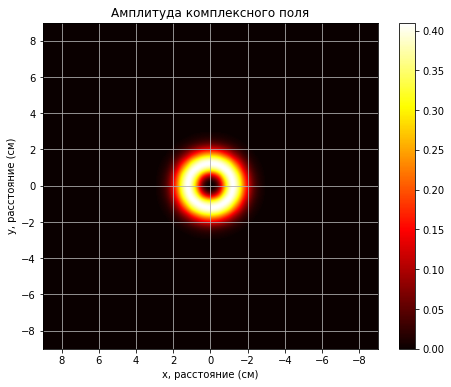

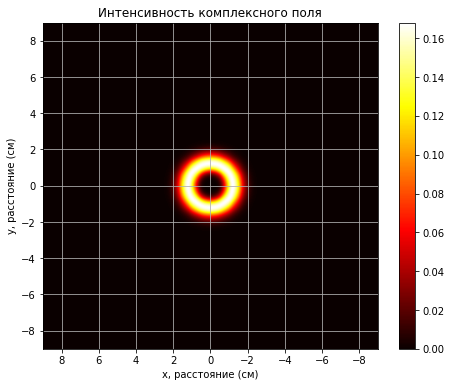

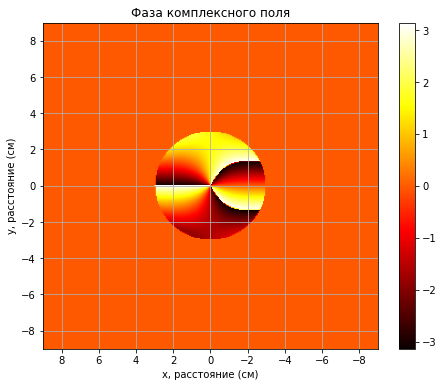

In [7]:
field, x_linspace, y_linspace = get_field_with_tilt_and_control_size(image_size=3, vertex_size=1, matrix_shape=(101, 101), m=3, sigma=1, alpha=0.5)
field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros = get_field_padded_zeros(field, (303, 303), x_linspace, y_linspace)
plot_field(field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros)

### Тестовый код, который выполняет FFT над вихревым полем

In [8]:
# # Параметры, с которыми будет выполняться код
# a=3 # Размер исходного поля
# N=101 # Число отсчётов картинки, поле которой мы генерируем
# M=505 # Число отсчётов, до которого дополняем поле до fft2
# b=N*N/4/a/M # Размер выходного поля после fft2 (с допущением, что длина волны обратно пропорциональна фокусному расстоянию)
# print("Размер выходного поля b =",b)

# # Генерируем поле лазера
# field, x_linspace, y_linspace = get_field_with_tilt_and_control_size(image_size=a, vertex_size=a, matrix_shape=(N, N), m=2, sigma=1, alpha=0.5)
# field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros = get_field_padded_zeros(field, (M, M), x_linspace, y_linspace)
# # Отприсовываем получившееся поле 
# #plot_field(field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros)

# # Выполняем fft2 преобразование (+ расщитываем масштаб)
# field_after_fft = np.fft.fft2(field_padded_zeros)
# field_after_fft = np.fft.fftshift(field_after_fft)
# # Отрезаем поле размером NxN
# field_after_fft = get_field_padded_zeros(field_after_fft, (N, N), x_linspace, y_linspace)[0]
# # Перерасчитываем масштаб поля после fft 
# x_linspace_after_fft = np.linspace(-b, b, field_after_fft.shape[0])
# y_linspace_after_fft = np.linspace(-b, b, field_after_fft.shape[1])
# # Отрисовываем картинки после fft2
# plot_field(field_after_fft, x_linspace_after_fft, y_linspace_after_fft)

### Определим функцию, которая выдает картинку после fft

In [9]:
# def get_field_after_tilt_and_fft(a, N, M, m, sigma, alpha):
#     """
#     Дополняет двухмерное изображение нулями до размера new_shape, если new_shape больше размера картини. Обрезает изображение до размера new_shape, если new_shape меньше размера картинки.
#     Если по одной оси надо обрезать, а по второй дополнить нулями, выкинется ValueError
#     :param a: Размер исходного поля
#     :param N: Число отсчётов картинки, поле которой мы генерируем
#     :param M: Число отсчётов, до которого дополняем поле до fft2
#     :param m: параметр пучка - угловой орбительный момент
#     :param sigma: параметр пучка - радиус перетяжки
#     :param alpha: параметр линзы, сквозь который проходит пучок - угол (в радианах) отклонения оси линзы от линии распространения пучка
#     :return ((field, x_linspace, y_linspace),(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2))
#     """
#     b=N*N/4/a/M # 
#     print("Размер выходного поля b =",b)
 
#     # Генерируем поле лазера
#     field, x_linspace, y_linspace = get_field_with_tilt_and_control_size(image_size=a, vertex_size=a, matrix_shape=(N, N), m=m, sigma=sigma, alpha=alpha)
#     field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros = get_field_padded_zeros(field, (M, M), x_linspace, y_linspace)
#     # Отприсовываем получившееся поле 
#     #plot_field(field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros)

#     # Выполняем fft2 преобразование (+ расщитываем масштаб)
#     field_after_fft = np.fft.fft2(field_padded_zeros)
#     field_after_fft = np.fft.fftshift(field_after_fft)
#     # Отрезаем поле размером NxN
#     field_after_fft = get_field_padded_zeros(field_after_fft, (N, N), x_linspace, y_linspace)[0]
#     # Перерасчитываем масштаб поля после fft 
#     x_linspace_after_fft = np.linspace(-b, b, field_after_fft.shape[0])
#     y_linspace_after_fft = np.linspace(-b, b, field_after_fft.shape[1])
#     # Отрисовываем картинки после fft2
#     #plot_field(field_after_fft, x_linspace_after_fft, y_linspace_after_fft)
    
#     return ((field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros),(field_after_fft, x_linspace_after_fft, y_linspace_after_fft))


# (field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_field_after_tilt_and_fft(a=3, N=101, M=505, m=2, sigma=1, alpha=0.5)
# plot_field(field, x_linspace, y_linspace)
# plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2)

## Определим функцию, которая выдает суперпозицию поля с разными параметрами m и соответствующими весами c. Она также выдаёт пропущенное через FFT поле.

Размер выходного поля b = 1.6833333333333333


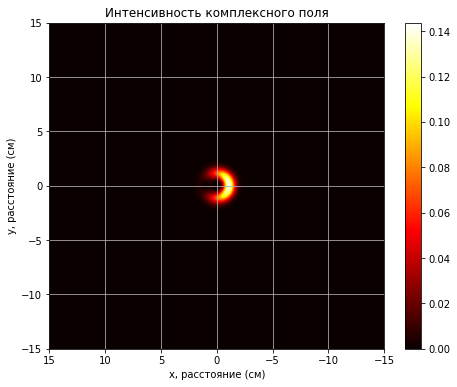

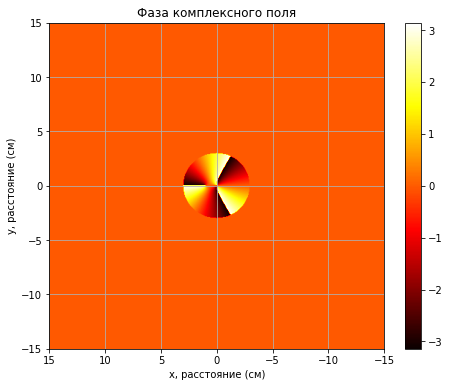

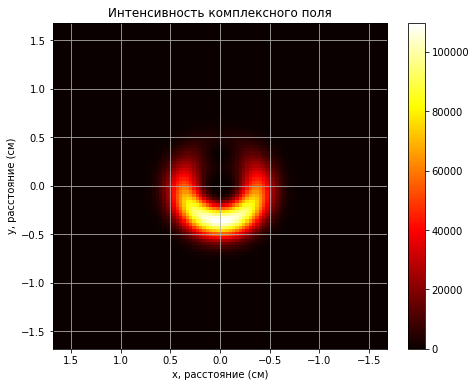

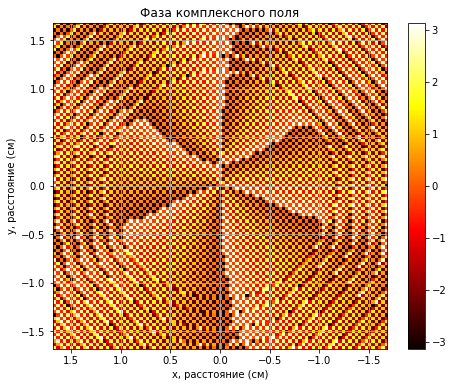

In [10]:
def get_superposition_field_after_tilt_and_fft(a, N, M, m, c, sigma, alpha):
    """
    Дополняет двухмерное изображение нулями до размера new_shape, если new_shape больше размера картини. Обрезает изображение до размера new_shape, если new_shape меньше размера картинки.
    Если по одной оси надо обрезать, а по второй дополнить нулями, выкинется ValueError
    :param a: Размер исходного поля
    :param N: Число отсчётов картинки, поле которой мы генерируем
    :param M: Число отсчётов, до которого дополняем поле до fft2
    :param m: параметр пучка - угловой орбительный момент
    :param c: параметр пучка - угловой орбительный момент
    :param sigma: параметр пучка - радиус перетяжки
    :param alpha: параметр линзы, сквозь который проходит пучок - угол (в радианах) отклонения оси линзы от линии распространения пучка
    :return ((field, x_linspace, y_linspace),(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2))
    """
    b=N*N/4/a/M # 
    print("Размер выходного поля b =",b)

    assert len(m)==len(c) 
    assert sum(c)>=1-1e-8 and sum(c)<=1+1e-8 # Сумма весов должна быть равна 1
    field_superposition = np.zeros((N,N), dtype=field.dtype) # Суперпозиция полей с разных m
    for m_i, c_i in zip(m, c):
        # Генерируем поле лазера
        field_i, x_linspace, y_linspace = get_field_with_tilt_and_control_size(image_size=a, vertex_size=a, matrix_shape=(N, N), m=m_i, sigma=sigma, alpha=alpha)
        field_superposition+=c_i*field_i
    field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros = get_field_padded_zeros(field_superposition, (M, M), x_linspace, y_linspace)
    # Отприсовываем получившееся поле 
    # plot_field(field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros)

    # Выполняем fft2 преобразование (+ расщитываем масштаб)
    field_after_fft = np.fft.fft2(field_padded_zeros)
    field_after_fft = np.fft.fftshift(field_after_fft)
    # Отрезаем поле размером NxN
    field_after_fft = get_field_padded_zeros(field_after_fft, (N, N), x_linspace, y_linspace)[0]
    # Перерасчитываем масштаб поля после fft 
    x_linspace_after_fft = np.linspace(-b, b, field_after_fft.shape[0])
    y_linspace_after_fft = np.linspace(-b, b, field_after_fft.shape[1])
    # Отрисовываем картинки после fft2
    # plot_field(field_after_fft, x_linspace_after_fft, y_linspace_after_fft)
    
    return ((field_padded_zeros, x_linspace_padded_zeros, y_linspace_padded_zeros),(field_after_fft, x_linspace_after_fft, y_linspace_after_fft))


(field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=[2,3], c=[0.5, 0.5], sigma=1, alpha=0.0)
plot_field(field, x_linspace, y_linspace, print_mode=["intensity", "phase"])
plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity", "phase"])

### Генерируем и смотрим на разные пучки

Размер выходного поля b = 1.6833333333333333


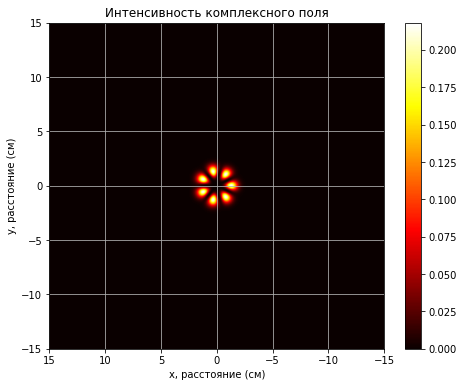

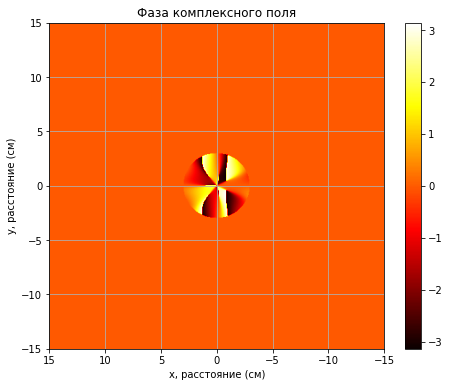

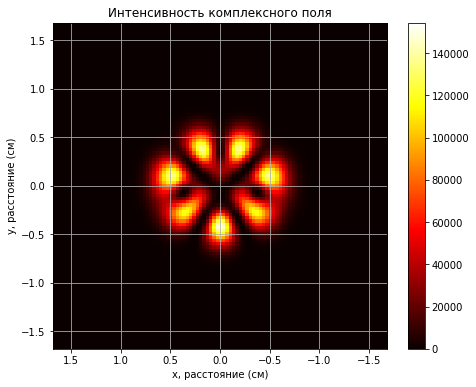

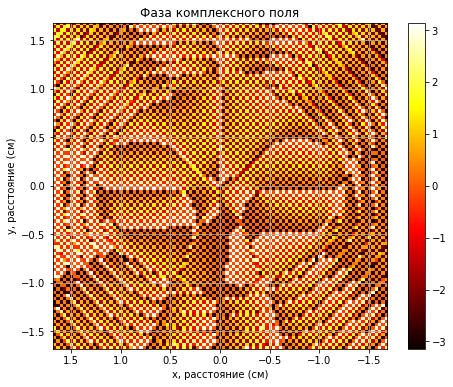

In [11]:

(field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=[-4,3], c=[0.5, 0.5], sigma=1, alpha=0.5)
plot_field(field, x_linspace, y_linspace, print_mode=["intensity", "phase"])
plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity", "phase"])

Размер выходного поля b = 1.6833333333333333


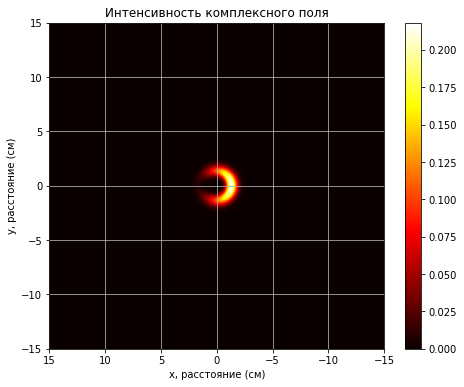

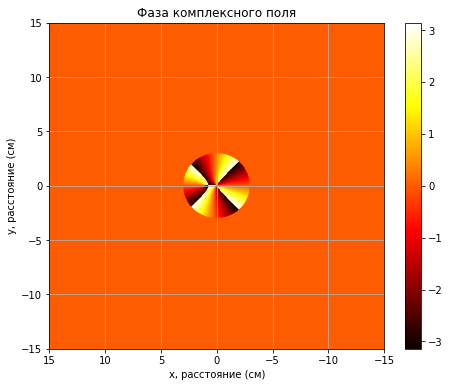

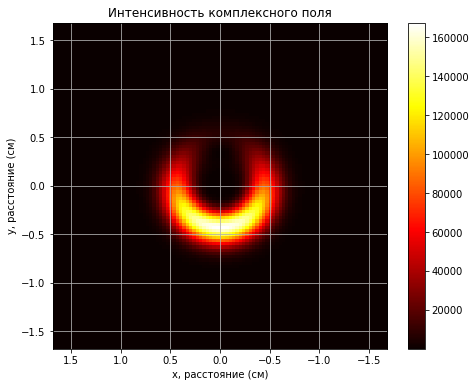

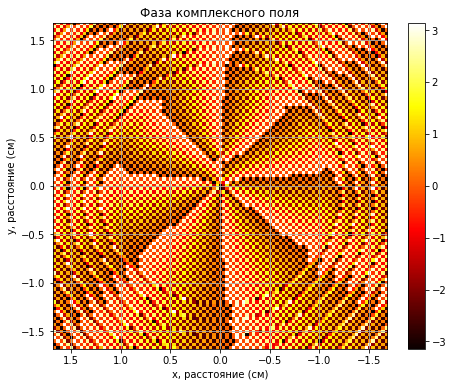

In [12]:
(field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=[3,4], c=[0.5, 0.5], sigma=1, alpha=0.0)
plot_field(field, x_linspace, y_linspace, print_mode=["intensity", "phase"])
plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity", "phase"])

### (Уже неактуально в этом ноутбуке) Реализуем функцию, преобразующую картинку из декартовой системы координат в полярную

In [13]:
# import cv2

In [14]:
# def field_cartesian_to_polar(img, interpolation_mode = cv2.WARP_FILL_OUTLIERS):
#     #--- the following holds the square root of the sum of squares of the image dimensions ---
#     #--- this is done so that the entire width/height of the original image is used to express the complete circular range of the resulting polar image ---
#     # value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0)) # если хотим диагональ картинки взять
#     value = min(img.shape[0]/2.0, img.shape[1]/2.0)
#     polar_image = cv2.linearPolar(img,(img.shape[0]/2, img.shape[1]/2), value, interpolation_mode)
#     return polar_image
    

# polar_image = field_cartesian_to_polar(abs(field))
# plot_field(polar_image, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

In [15]:
# polar_image = field_cartesian_to_polar(abs(field_after_fft2))
# plot_field(polar_image, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

### (Уже неактуально в этом ноутбуке) Убеждаемся, что перевод в полярную систему координат от cv2 корректный

In [16]:


# import skimage

# #image_filename = "https://img3.akspic.ru/previews/3/3/2/7/6/167233/167233-apelsin-nauka-fizika-predvychislenie-matematika-500x.jpg"
# image_filename = "https://cs8.pikabu.ru/post_img/2016/09/11/10/147361593115556395.png"

# image_numpy = skimage.io.imread( image_filename )


# plot_field(image_numpy, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["amplitude"])

# polar_image_numpy = field_cartesian_to_polar(image_numpy)
# plot_field(polar_image_numpy, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["amplitude"])

## (Уже неактуально в этом ноутбуке) Cмотрим на пучки в полярной системе координат

In [17]:
# this_m = [4, 11]
# this_c = [0.3, 0.7]
# this_alpha=0.5
# (field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=this_m, c=this_c, sigma=1, alpha=this_alpha)
# #plot_field(field, x_linspace, y_linspace, print_mode=["intensity"])
# plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])
# polar_image = field_cartesian_to_polar(abs(field_after_fft2))
# plot_field(polar_image, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

In [18]:
# this_m = [3, 5]
# this_c = [0.5, 0.5]
# this_alpha=0.0
# (field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=this_m, c=this_c, sigma=1, alpha=this_alpha)
# #plot_field(field, x_linspace, y_linspace, print_mode=["intensity"])
# plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])
# polar_image = field_cartesian_to_polar(abs(field_after_fft2))
# plot_field(polar_image, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

# Начнём собирать датасет

#### Берем суперпозиции вихрей с постоянными и равными весам. Величины углового орбитального момента m целые, различные по знакам и лежат в диапазоне [-5, 5]

Размер выходного поля b = 1.6833333333333333


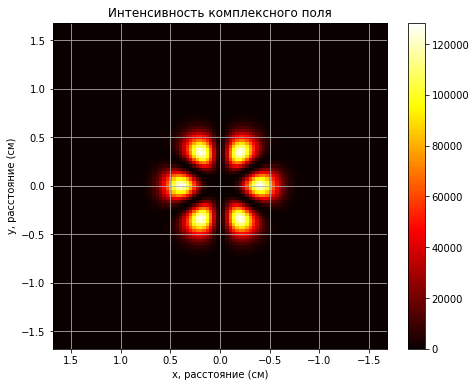

In [19]:
this_m = [-3, 3]
this_c = [0.5, 0.5]
this_alpha=0.0
(field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=this_m, c=this_c, sigma=1, alpha=this_alpha)
# plot_field(field, x_linspace, y_linspace, print_mode=["intensity"])
plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

Размер выходного поля b = 1.6833333333333333


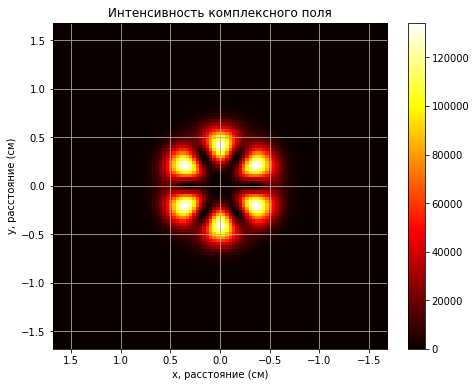

In [20]:
this_m = [-4, 2]
this_c = [0.5, 0.5]
this_alpha=0.0
(field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=101, M=505, m=this_m, c=this_c, sigma=1, alpha=this_alpha)
#plot_field(field, x_linspace, y_linspace, print_mode=["intensity"])
plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

Размер выходного поля b = 1.0826732673267327


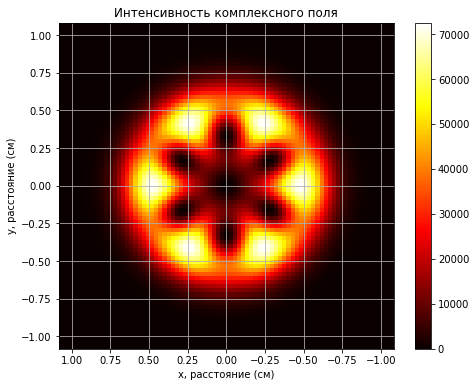

In [21]:
this_m = [-5, 1]
this_c = [0.5, 0.5]
this_alpha=0.0
(field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=81, M=505, m=this_m, c=this_c, sigma=1, alpha=this_alpha)
#plot_field(field, x_linspace, y_linspace, print_mode=["intensity"])
plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

#### **Сгенерируем выборку в несколько классов и формируем массив изображений и их метки**

In [22]:
image_shape=81
beam_images=[]
beam_label=[]

counter_pictures=0
for i in range(0,6): #0..5
    for j in range(-5,0): #-5..-1
        counter_pictures+=1
        print("|m1-m2| =", i-j, "\tm1 =", i, "m2 =", j)
        this_m = [i, j]
        (field, x_linspace, y_linspace), (field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2) = get_superposition_field_after_tilt_and_fft(a=3, N=image_shape, M=505, m=this_m, c=[0.5, 0.5], sigma=1, alpha=0.0)
        #plot_field(field, x_linspace, y_linspace, print_mode=["intensity"])
        field_after_fft2 = abs(field_after_fft2)
        beam_images.append(field_after_fft2[np.newaxis, ...])
        beam_label.append([i-j,i,j])
        
        #!plot_field(field_after_fft2, x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])
        
        
beam_images=np.concatenate(beam_images, axis=0)
beam_images.shape

|m1-m2| = 5 	m1 = 0 m2 = -5
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 4 	m1 = 0 m2 = -4
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 3 	m1 = 0 m2 = -3
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 2 	m1 = 0 m2 = -2
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 1 	m1 = 0 m2 = -1
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 6 	m1 = 1 m2 = -5
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 5 	m1 = 1 m2 = -4
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 4 	m1 = 1 m2 = -3
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 3 	m1 = 1 m2 = -2
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 2 	m1 = 1 m2 = -1
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 7 	m1 = 2 m2 = -5
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 6 	m1 = 2 m2 = -4
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 5 	m1 = 2 m2 = -3
Размер выходного поля b = 1.0826732673267327
|m1-m2| = 4 	m1 = 2 m2 = -2
Размер выходного поля b

(30, 81, 81)

[6, 5, -1]


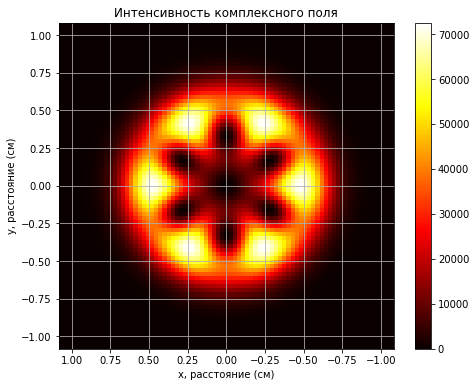

In [23]:
print(beam_label[29])
plot_field(beam_images[29], x_linspace_after_fft2, y_linspace_after_fft2, print_mode=["intensity"])

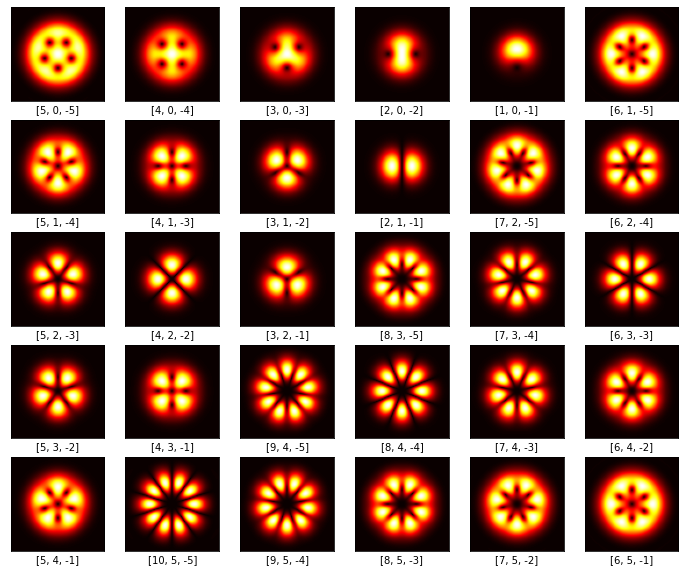

In [24]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(beam_images[i], cmap=plt.cm.hot)
#     plt.xlabel(class_names[beam_label[i]])
    plt.xlabel(beam_label[i])


In [25]:
beam_label

[[5, 0, -5],
 [4, 0, -4],
 [3, 0, -3],
 [2, 0, -2],
 [1, 0, -1],
 [6, 1, -5],
 [5, 1, -4],
 [4, 1, -3],
 [3, 1, -2],
 [2, 1, -1],
 [7, 2, -5],
 [6, 2, -4],
 [5, 2, -3],
 [4, 2, -2],
 [3, 2, -1],
 [8, 3, -5],
 [7, 3, -4],
 [6, 3, -3],
 [5, 3, -2],
 [4, 3, -1],
 [9, 4, -5],
 [8, 4, -4],
 [7, 4, -3],
 [6, 4, -2],
 [5, 4, -1],
 [10, 5, -5],
 [9, 5, -4],
 [8, 5, -3],
 [7, 5, -2],
 [6, 5, -1]]

### Выясним сбалансированность данных 

In [26]:
tmp_beam_label = []
for i,_,_ in beam_label:
    tmp_beam_label.append(i)
tmp_beam_label


for i in set(tmp_beam_label):
    print(i,"\t", tmp_beam_label.count(i))


1 	 1
2 	 2
3 	 3
4 	 4
5 	 5
6 	 5
7 	 4
8 	 3
9 	 2
10 	 1


мб было бы логичным выкинуть картинки с постоянным |m1-m2|, у которых мало различных уникальных картинок, но это потом

### **Аугментация данных**

### Аугментация поворотом:

Реализуем поворот из статьи https://arboook.com/kompyuternoe-zrenie/osnovnye-operatsii-s-izobrazheniyami-v-opencv-3-python/

Протестируем код на одной картинке:

Text(0.5, 0, '[2, 0, -2]')

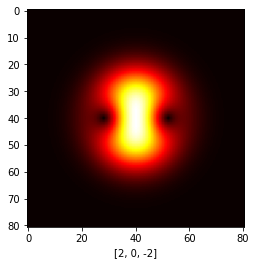

In [27]:
plt.imshow(beam_images[3], cmap=plt.cm.hot)
plt.xlabel(beam_label[3])

In [28]:
for angle in np.linspace(0,360,6, endpoint=False):
    print(angle)

0.0
60.0
120.0
180.0
240.0
300.0


In [29]:
import cv2

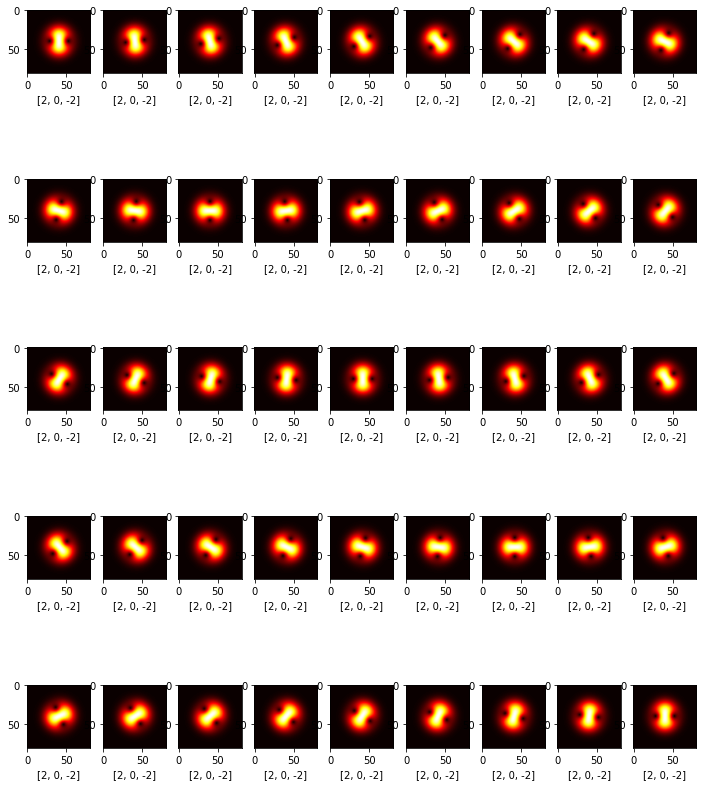

In [30]:
plt.figure(figsize=(12,15))
for index, angle in enumerate(np.linspace(0,360,45)):
    plt.subplot(5,9,index+1)
    image = beam_images[3]
    #получим размеры изображения для поворота
    # и вычислим центр изобрафжения
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    # повернем изображение на angle градусов
    # todo можно 
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    plt.imshow(rotated, cmap=plt.cm.hot)
    plt.xlabel(beam_label[3])
    

Обобщим код и обернем в функцию:






In [31]:
def angle_augmentation(image, label = None, num = 30, plot=False):
    """
    Функция поворачивает картинку на углы из np.linspace(0, 360, num, endpoint=False)
    Т.е. 360 градусов разбивается на num отсчётов. И каждая картинка будет повернута на величину этого отсчёта
    :param image: Исходное изображение
    :param label: Необязательная подпись к изображению, которая отобразится на рисунке, если параметр plot=True
    :param num: Количество изображений, которые будут сгенерированы. Число 
    :param plot: Булевый параметр, если True, то каждое вычисленное изображение будет выведено на экран. Если False, то ничего не будет выводиться
    :return Возвращает массив из num изображений, каждая из которых повернута  вокруг центра изображения
    """
    result_rotated = []
    if plot:
        plt.figure(figsize=(12,15))
    for index, angle in enumerate(np.linspace(0, 360, num, endpoint=False)):
        if plot:
            plt.subplot(5, math.ceil(num/5),index+1)
        #получим размеры изображения для поворота
        # и вычислим центр изображения
        (h, w) = image.shape[:2]
        center = (w / 2, h / 2)

        # повернем изображение на angle градусов
        # todo: можно рандом в поворот вкрячить ещё
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h))
        if plot:
            plt.imshow(rotated, cmap=plt.cm.hot)
            plt.xlabel(label)
        result_rotated.append(rotated[np.newaxis, ...])
    
    result_rotated=np.concatenate(result_rotated, axis=0)
    return result_rotated
    
tmp_11=angle_augmentation(beam_images[3], beam_label[3], num=30)
tmp_11.shape

(30, 81, 81)

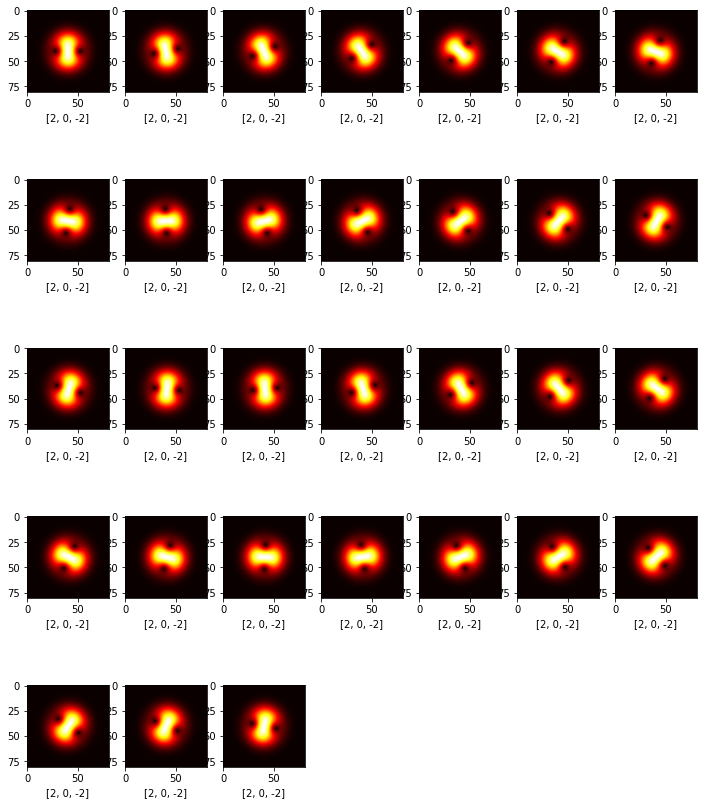

In [32]:
tmp_12=angle_augmentation(beam_images[3], beam_label[3], num=31, plot=True)

In [33]:
after_angular_images = np.zeros(shape=(0, beam_images.shape[1], beam_images.shape[2]))
for image, label in zip(beam_images, beam_label): # идём по каждой картинке
    result_angle_augmentation = angle_augmentation(image, label, num=45)
    after_angular_images = np.concatenate((after_angular_images, result_angle_augmentation), axis=0)
    print(result_angle_augmentation.shape)
after_angular_images.shape

(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)
(45, 81, 81)


(1350, 81, 81)

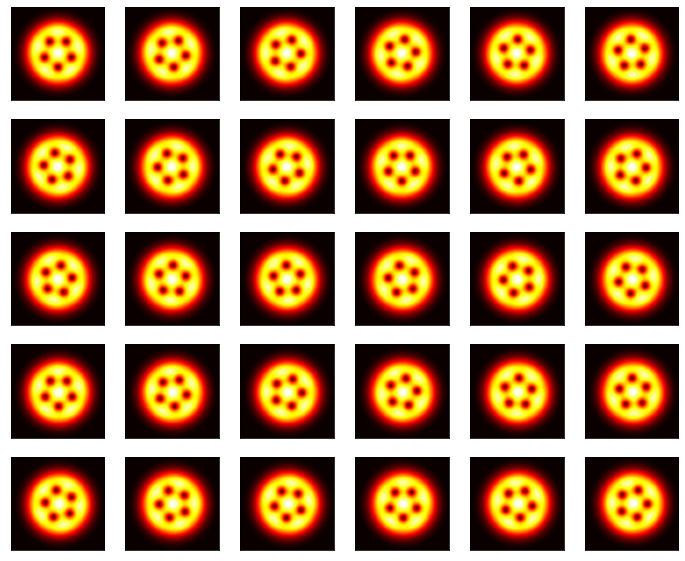

In [34]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(after_angular_images[i], cmap=plt.cm.hot)


todo: Полученные изображения мы будем масштабировать(такое может быть, если добавили линзу), поворачивать (добавление пластинки для набега фазы, малейший сдвиг лазера), сдвиг, шум, зеркалить?

### Аугментация сдвигом

Протестируем код на одной картинке:

Text(0.5, 0, '[2, 0, -2]')

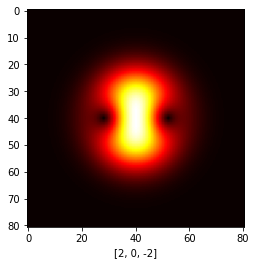

In [35]:
plt.imshow(beam_images[3], cmap=plt.cm.hot)
plt.xlabel(beam_label[3])

Text(0.5, 0, '[2, 0, -2]')

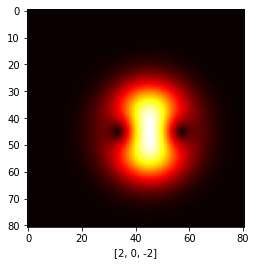

In [36]:
image = beam_images[3]
#получим размеры изображения для поворота
# и вычислим центр изобрафжения
(h, w) = image.shape[:2]
# сдвинем изображение

(width_shift, height_shift) = (5, 5)
shifting_matrix = np.array([[1,0,width_shift],[0,1,height_shift]], dtype=np.float64)
shifted_image = cv2.warpAffine(image, shifting_matrix, (w, h))

plt.imshow(shifted_image, cmap=plt.cm.hot)
plt.xlabel(beam_label[3])

Обобщим код и обернем в функцию:

(2, 81, 81)

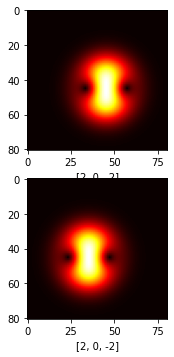

In [37]:
def shift_augmentation(image, label = None, image_shift_array=[(0,0)], plot=False):
    """
    Функция сдвигает картинку и возвращает массив изображений, сдвинутых на величину image_shift_array
    :param image: Исходное изображение
    :param label: Необязательная подпись к изображению, которая отобразится на рисунке, если параметр plot=True
    :param image_shift_array: список из кортежей, первой число в кортеже отвечает за сдвиг изображения по горизонтальной оси, а второе число за сдвиг по вертикальной оси
    :param plot: Булевый параметр, если True, то каждое высичленное изображение будет выведено на экран. Если False, то ничего не будет выводиться
    :return возвращает массив изображений, каждая из которых сдвинута на соответствующую величину из image_shift_array
    """
    assert len(image.shape) == 2
    
    result_shifted = []
    if plot:
        plt.figure(figsize=(12,15))
    for index, image_shift in enumerate(image_shift_array):
        if plot:
            plt.subplot(5, math.ceil(len(image_shift_array)/5),index+1)
        #получим размеры изображения для поворота
        (h, w) = image.shape[:2]

        # сдвинем изображение
        # todo: можно рандом в сдвиг вкрячить ещё
        (width_shift, height_shift) = image_shift
        shifting_matrix = np.array([[1, 0, width_shift], [0, 1, height_shift]], dtype=np.float64)
        shifted_image = cv2.warpAffine(image, shifting_matrix, (w, h))
        if plot:
            plt.imshow(shifted_image, cmap=plt.cm.hot)
            plt.xlabel(label)
        result_shifted.append(shifted_image[np.newaxis, ...])
        # todo: не забыть индексы пересчитать тут
    
    result_rotated=np.concatenate(result_shifted, axis=0)
    return result_rotated
    
tmp_15=shift_augmentation(beam_images[3], beam_label[3], image_shift_array=[(5,5), (-5,5)], plot=True)
tmp_15.shape

Эмпирически определим маскимальное количество пикселей, на которое можно сдвинуть самый "широкий" пучок, чтобы он не уходил за пределы окна изображения.

(2, 81, 81)

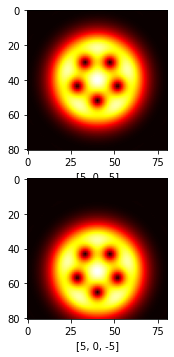

In [38]:
tmp_15=shift_augmentation(beam_images[0], beam_label[0], image_shift_array=[(0,0), (0,13)], plot=True)
tmp_15.shape

У нас получилось 13/81≈1/6. Именно таким далее в коде и возьмем значение перемнной `scale`

Генерируем массив сдвигов, который будем скармливать в `shift_augmentation()`

In [39]:
def generate_shift_array(image, scale = 1/6, step = 2):
  """
  Генерируем массив кортежей, которые представляют декартово произведение из возможных сдвигов на изображения на scale процентов по горизонтальной и вертикальной оси
  Ну, массив координат сетки с числами, на сколько надо сдвигать изображение.
  Вся эта функция написана ради того, чтобы сдвиги были целыми числами
  :param image: Исходное изображение
  :param scale: На какой процент от изображения можно маскимально сдвигать изображение
  :param step: 
  """
  assert len(image.shape) == 2
  
  max_width_shift_value = int(scale * image.shape[0])  # по картинке эмпирически подобрали максимальную величину сдвига. Чтобы не пучок не вылетал за границы икна изображения
  max_width_shift_value = max_width_shift_value // 2 * 2  # округляем до ближайшего снизу числа, делящегося на два. Для того чтобы в range(-max_width_shift_value, max_width_shift_value + 1, 2) был значение ноль
  # print("max_width_shift_value =", max_width_shift_value)
  width_range = range(-max_width_shift_value, max_width_shift_value + 1, step)

  max_height_shift_value = int(scale * image.shape[1])  # по картинке эмпирически подобрали максимальную величину сдвига. Чтобы не пучок не вылетал за границы икна изображения
  max_height_shift_value = max_height_shift_value // 2 * 2  # округляем до ближайшего снизу числа, делящегося на два. Для того чтобы в range(-max_height_shift_value, max_height_shift_value + 1, 2) был значение ноль
  # print("max_height_shift_value =", max_height_shift_value)
  height_range = range(-max_height_shift_value, max_height_shift_value + 1, step)

  i_coords, j_coords = np.meshgrid(width_range, height_range)
  return np.vstack((i_coords.flatten(), j_coords.flatten())).T

image_shift_array_tmp = generate_shift_array(beam_images[3])
print("image_shift_array_tmp.shape =", image_shift_array_tmp.shape)
image_shift_array_tmp[:5] # Первые пять элементов

image_shift_array_tmp.shape = (169, 2)


array([[-12, -12],
       [-10, -12],
       [ -8, -12],
       [ -6, -12],
       [ -4, -12]])

 Протестируем аугментацию сдвигом, описанную в методах `shift_augmentation()` и `generate_shift_array()` на одной тестовой картинке

In [40]:
image_shift_array_test2 = generate_shift_array(beam_images[3], scale=1/6, step = 6)
len(image_shift_array_test2)

25

(25, 81, 81)

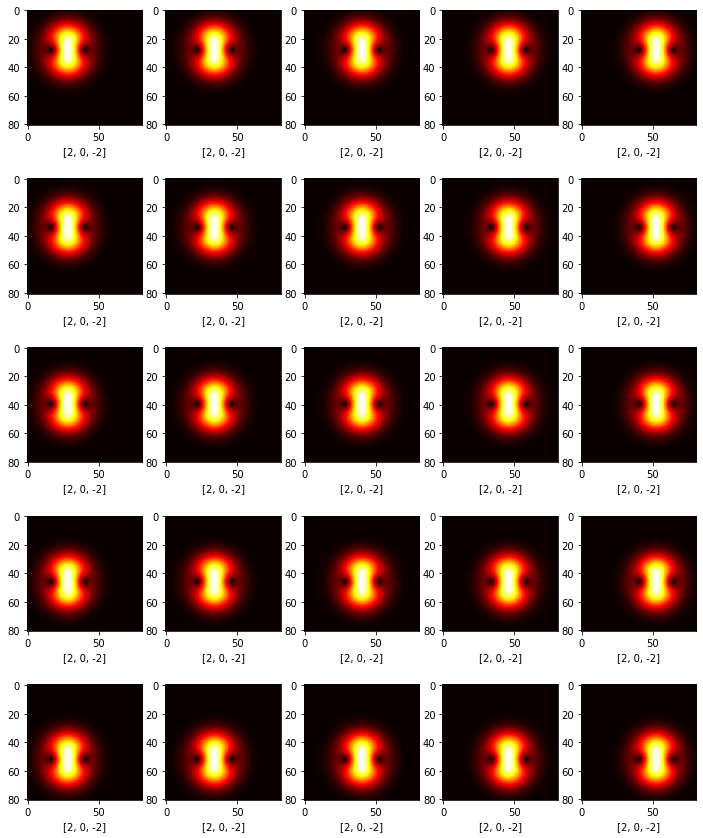

In [41]:
tmp_15=shift_augmentation(beam_images[3], beam_label[3], image_shift_array=image_shift_array_test2, plot=True)
tmp_15.shape

#### **Объединим вышеприведенные аументации поворотом и сдвигом:**

In [42]:
def make_shift_aumentation_for_array(beam_images, beam_labels):

  after_angular_images = np.zeros(shape=(0, beam_images.shape[1], beam_images.shape[2]))
  after_angular_labels = np.zeros(shape=(0, 3))
  for image, label in zip(beam_images, beam_labels): # идём по каждой картинке
      assert type(label) is list, "Если label не list, то некорректно произойдет склеивание меток несколькими строчками кода ниже"
      result_angle_augmentation = angle_augmentation(image, label, num=45)
      after_angular_images = np.concatenate((after_angular_images, result_angle_augmentation), axis=0)  # склеиваем картинки вместе
      after_angular_labels = np.concatenate((after_angular_labels, [label]*len(result_angle_augmentation)), axis=0)  # склеиваем метки картинок вместе
      print("after_angular_images.shape =", after_angular_images.shape, "\tи after_angular_labels.shape =", after_angular_labels.shape)
  return (after_angular_images, after_angular_labels)

after_angular_images, after_angular_labels = make_shift_aumentation_for_array(beam_images, beam_label)

after_angular_images.shape = (45, 81, 81) 	и after_angular_labels.shape = (45, 3)
after_angular_images.shape = (90, 81, 81) 	и after_angular_labels.shape = (90, 3)
after_angular_images.shape = (135, 81, 81) 	и after_angular_labels.shape = (135, 3)
after_angular_images.shape = (180, 81, 81) 	и after_angular_labels.shape = (180, 3)
after_angular_images.shape = (225, 81, 81) 	и after_angular_labels.shape = (225, 3)
after_angular_images.shape = (270, 81, 81) 	и after_angular_labels.shape = (270, 3)
after_angular_images.shape = (315, 81, 81) 	и after_angular_labels.shape = (315, 3)
after_angular_images.shape = (360, 81, 81) 	и after_angular_labels.shape = (360, 3)
after_angular_images.shape = (405, 81, 81) 	и after_angular_labels.shape = (405, 3)
after_angular_images.shape = (450, 81, 81) 	и after_angular_labels.shape = (450, 3)
after_angular_images.shape = (495, 81, 81) 	и after_angular_labels.shape = (495, 3)
after_angular_images.shape = (540, 81, 81) 	и after_angular_labels.shape = (540,

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


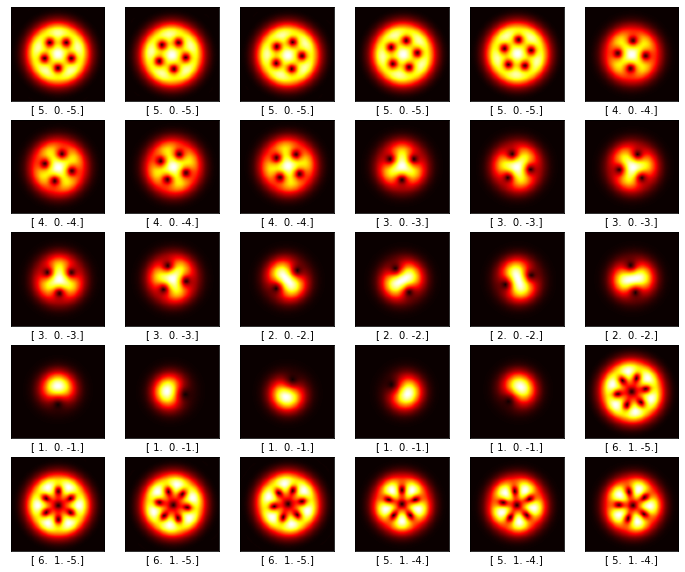

In [43]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(after_angular_images[i*10], cmap=plt.cm.hot)
    plt.xlabel(after_angular_labels[i*10])


In [44]:
def make_shift_aumentation_for_array(beam_images, beam_labels):

  after_angular_and_shift_images = np.zeros(shape=(0, beam_images.shape[1], beam_images.shape[2]))
  after_angular_and_shift_labels = np.zeros(shape=(0, 3))

  for image, label in zip(beam_images, beam_labels): # идём по каждой картинке
      # аугментация сдвигом
      image_shift_array_tmp = generate_shift_array(beam_images[3], scale=1/6, step = 6)
      result_shift_augmentation = shift_augmentation(image, label, image_shift_array=image_shift_array_tmp)
      after_angular_and_shift_images = np.concatenate((after_angular_and_shift_images, result_shift_augmentation), axis=0)  # склеиваем картинки вместе
      after_angular_and_shift_labels = np.concatenate((after_angular_and_shift_labels, [label]*len(result_shift_augmentation)), axis=0)  # склеиваем метки картинок вместе
      print("after_angular_and_shift_images.shape =", after_angular_and_shift_images.shape, "\tи after_angular_and_shift_labels.shape =", after_angular_and_shift_labels.shape)
  return (after_angular_and_shift_images, after_angular_and_shift_labels)


after_angular_and_shift_images, after_angular_and_shift_labels = make_shift_aumentation_for_array(after_angular_images, after_angular_labels)

after_angular_and_shift_images.shape = (25, 81, 81) 	и after_angular_and_shift_labels.shape = (25, 3)
after_angular_and_shift_images.shape = (50, 81, 81) 	и after_angular_and_shift_labels.shape = (50, 3)
after_angular_and_shift_images.shape = (75, 81, 81) 	и after_angular_and_shift_labels.shape = (75, 3)
after_angular_and_shift_images.shape = (100, 81, 81) 	и after_angular_and_shift_labels.shape = (100, 3)
after_angular_and_shift_images.shape = (125, 81, 81) 	и after_angular_and_shift_labels.shape = (125, 3)
after_angular_and_shift_images.shape = (150, 81, 81) 	и after_angular_and_shift_labels.shape = (150, 3)
after_angular_and_shift_images.shape = (175, 81, 81) 	и after_angular_and_shift_labels.shape = (175, 3)
after_angular_and_shift_images.shape = (200, 81, 81) 	и after_angular_and_shift_labels.shape = (200, 3)
after_angular_and_shift_images.shape = (225, 81, 81) 	и after_angular_and_shift_labels.shape = (225, 3)
after_angular_and_shift_images.shape = (250, 81, 81) 	и after_angular_

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


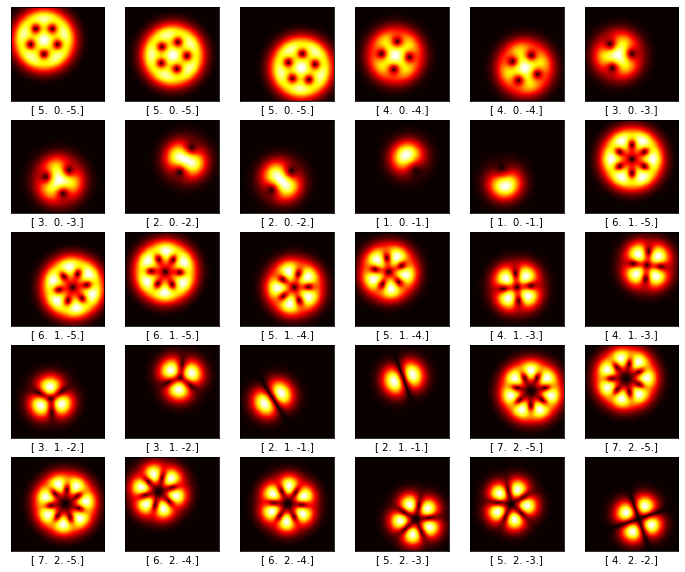

In [45]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(after_angular_and_shift_images[i*512], cmap=plt.cm.hot)
    plt.xlabel(after_angular_and_shift_labels[i*512])


### **Сохраняем полученные изображения в файл** *Курсив*

In [46]:
import pickle

In [47]:
with open('after_angular_and_shift_images.pkl','wb') as file_images:
  pickle.dump(after_angular_and_shift_images, file_images)

In [48]:
# np.savetxt('after_angular_and_shift_labels.csv', after_angular_and_shift_labels, delimiter=',')
with open('after_angular_and_shift_labels.pkl','wb') as file_images:
  pickle.dump(after_angular_and_shift_labels, file_images)

### **Проверяем результат сохранения в файл:**

In [49]:
beam_label[3]

[2, 0, -2]

In [50]:
after_angular_and_shift_labels[0]

array([ 5.,  0., -5.])

In [51]:
with open('after_angular_and_shift_images.pkl', 'rb') as file_images_read:
  images_new_raw = pickle.load(file_images_read)

In [52]:
with open('after_angular_and_shift_labels.pkl', 'rb') as file_labels_read:
  labels_new = pickle.load(file_labels_read).astype(int)  # дополнительно приводим к целим значениям

Нормализовываем каждое изображение (чтобы значение пикселя было в диапазоне [0, 1]):

In [53]:
images_new_raw.shape

(33750, 81, 81)

In [54]:
images_new = images_new_raw.copy()
for index, one_image in enumerate(images_new_raw):
  images_new[index] = one_image / np.max(one_image)

del(images_new_raw) # очищаем большую переменную

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


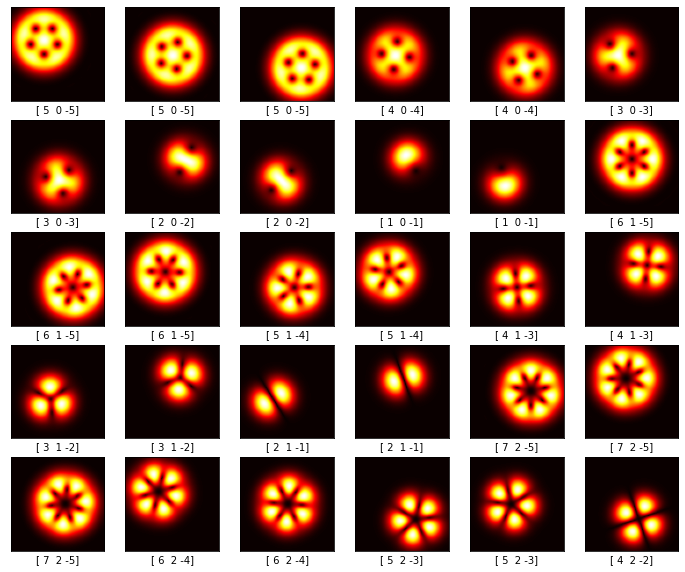

In [55]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_new[i*512], cmap=plt.cm.hot)
    plt.xlabel(labels_new[i*512])


### Готовим данные на train и test:

In [56]:
images_new.shape

(33750, 81, 81)

In [57]:
labels_new.shape

(33750, 3)

In [58]:
from sklearn.model_selection import train_test_split

data, labels = np.arange(10).reshape((5, 2)), range(5)

data_train, data_test, labels_train_raw, labels_test_raw = train_test_split(images_new, labels_new, test_size=0.20, random_state=42)

In [59]:
labels_train_raw[0]

array([10,  5, -5])

In [60]:
# отбросим лишние данные из массивов labels и делаем их целочисленными в диапазоне [0,9]
labels_train = labels_train_raw[:,0] - 1
labels_test = labels_test_raw[:,0] - 1

del(labels_train_raw) # очищаем переменную
del(labels_test_raw) # очищаем переменную

labels_train

array([9, 6, 3, ..., 6, 4, 2])

In [78]:
class_names = [1,2,3,4,5,6,7,8,9,10] # маппинг ответов нейронки на реальное значение модуля разницы между угловыми орбитальными моментами двух пучков в их суперпозиции. Т.е. если нейронка выдаёт 0, то действительная разницы угловых орб моментов равна 1

Посмотрим на первые 30 изображений после разбиения на train и test и после шафлинга:

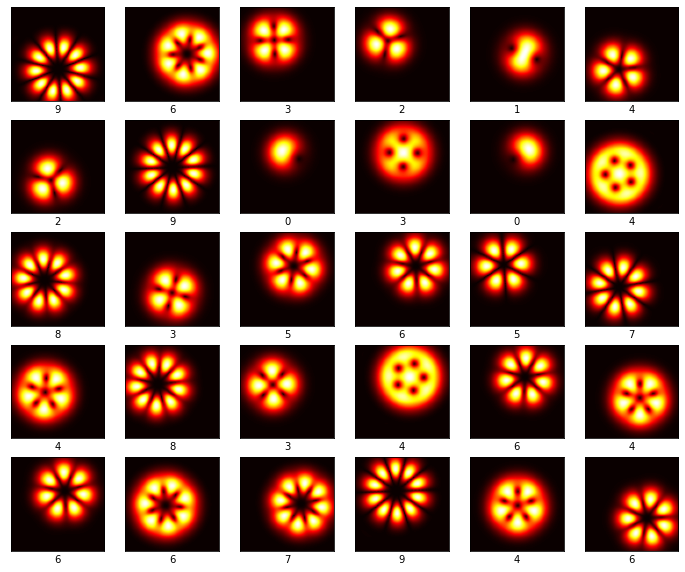

In [61]:
plt.figure(figsize=(12,10))
for i in range(30):
    plt.subplot(5,6,i+1) # индексы тут и в figure наоборот, как ни странно
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i], cmap=plt.cm.hot)
    plt.xlabel(labels_train[i])


### Далее при обучении модели воспроизводим статью https://habr.com/ru/post/426797/

In [62]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Строим модель

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(81, 81)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Компилирование модели

In [64]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(data_train, labels_train, epochs=5)

Epoch 1/5
844/844 [==============================] - 5s 6ms/step - loss: 1.0324 - accuracy: 0.5680
Epoch 2/5
844/844 [==============================] - 5s 6ms/step - loss: 0.5288 - accuracy: 0.7803
Epoch 3/5
844/844 [==============================] - 5s 6ms/step - loss: 0.3662 - accuracy: 0.8597
Epoch 4/5
844/844 [==============================] - 5s 6ms/step - loss: 0.2693 - accuracy: 0.9093
Epoch 5/5
844/844 [==============================] - 5s 6ms/step - loss: 0.2107 - accuracy: 0.9348


In [66]:
test_loss, test_acc = model.evaluate(data_test, labels_test)
print('Test accuracy:', test_acc)

211/211 [==============================] - 1s 4ms/step - loss: 0.2112 - accuracy: 0.9335
Test accuracy: 0.9334814548492432


### Прогнозирование



In [75]:
predictions = model.predict(data_test)

In [76]:
np.argmax(predictions[0])

5

Напишем функции для визуализации предсказаний

In [101]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.hot)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("pred={}, prob={:2.0f}%, (real={})".format(class_names[predicted_label],
                              100*np.max(predictions_array),
                              class_names[true_label]),
                              color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

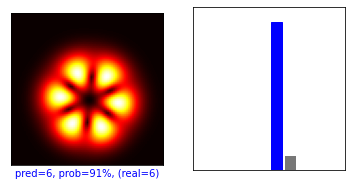

In [102]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, labels_test, data_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  labels_test)

### Посмотрим на результат предсказаний:

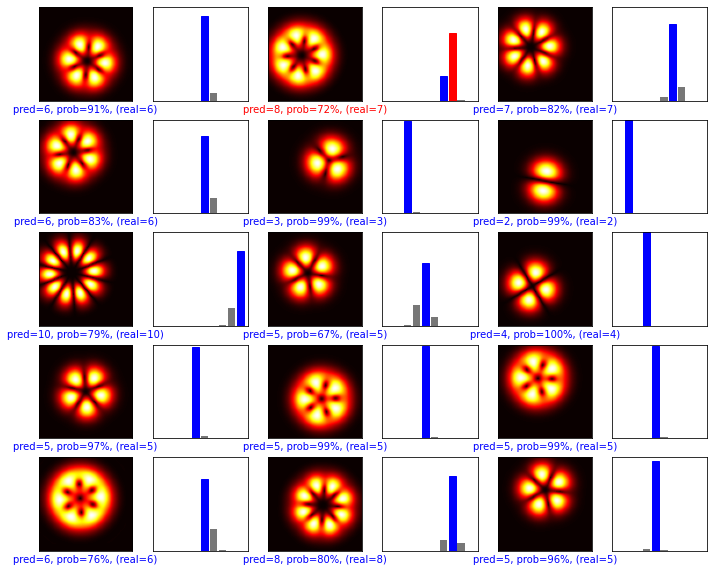

In [109]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, data_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  labels_test)